## Extreme Gradient Boosting with XGBoost

### Chapter 1. Classification with XGBoost

#### 1.1 Basci topics review

**Supervised learning**:
    * problems involved **labeled data**
    * The outcome might be *binary or multi-class*
    * Common evaluation metric: ROC-AUC curve, accuracy, and confusion matrix

**Data requirements**:
    * Features should be either numeric or categorical
    * Numeric features should be scaled (Z-scored)
    * Categorical features should be encoded (one-hot)



#### 1.2 Introducing XGBoost

What is XGBoost?

* Optimized gradient-boosting machine learning library
* Origianlly written in C++
* Has APIs in many different languages:
    * Python
    * R
    * Scala
    * Julia
    * Java

What makes XGBoost so popular?

1. speed and performance
2. core algorithm is parallelizable
3. consistently outperforms single-algorithm methods
4. state-of-art performance in many (ML)Machine Learning tasks

In [1]:
# XGBoost example in scikit-learn
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# find dataset
churn_data = pd.read_csv('5_datasets/telecom_churn_clean.csv')
# print(churn_data.head())

# extract and split data
X, y = churn_data.iloc[:, :-1], churn_data.iloc[:, -1]
# X, y = churn_data.drop('churn', axis=1), churn_data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123)

# create a XGB classification model
xg_cl = xgb.XGBClassifier(objective='binary:logistic',
                         n_estimators=10,
                         seed=123)
xg_cl.fit(X_train, y_train)
y_pred = xg_cl.predict(X_test)

# compute the accuracy (2 ways)
accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
accuracy_2 = accuracy_score(y_test, y_pred)
print('Accuracy: %f' %(accuracy))
print('Accuracy score: {:.3f}'.format(accuracy_2))


Accuracy: 0.964018
Accuracy score: 0.964


#### 1.3 Decision Tree

* XGBoost is an ensemble algorithm method
* It used decision trees as its base learners
* Composed of a series of binary questions
* At the bottom of each decision tree, there is a single possible decision/ prediction
* It is constructed iteratively until a stopping criterion is met
* Individual desicion trees tend to overfit
* It means that individual decision trees are in general **low-bias, high-variance** learning models
* XGBoost uses **CART** (classification and regression trees)
* Each leaf always contains a real-value score
* It can be converted into categories if necessary

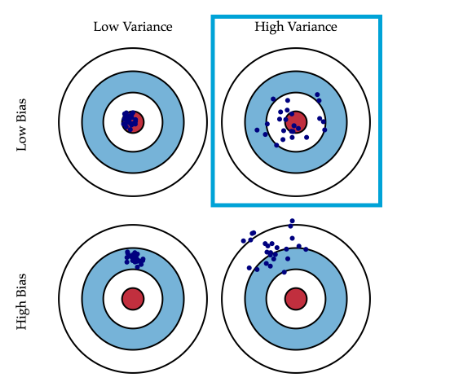

In [2]:
from IPython import display
display.Image("Images/5_dt_bias_variance.PNG")

In [3]:
# decision tree in scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# get dataset
breast_cancer = pd.read_csv('5_datasets/breast_cancer.csv')
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
X = breast_cancer.drop(['id','diagnosis', 'Unnamed: 32'], axis=1)
y = breast_cancer['diagnosis']=='M'
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)

# create a DT classification model
dt_clf_4 = DecisionTreeClassifier(max_depth=4, random_state=1)
dt_clf_4.fit(X_train, y_train)
y_pred_4 = dt_clf_4.predict(X_test)

# compute the accuracy
accuracy = accuracy_score(y_test, y_pred_4)
# accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print('Accuracy: %f' %(accuracy))

Accuracy: 0.947368


#### 1.4 Boosting

Boosting is not a specific meachine learning algorithm, it is a concept that can be applied to a set of machine learning models, it can be called a **"meta-algorithm"**.

In short, boosting is an ensemble meta-algorithm used to convert a collection of **weak learners** into a **stronger learner**.

How does it work?

1. Iteratively learning a set of weak models on **subsets** of the data
2. **Weighing** each weak prediction according to each weak learner's performance
3. Combine the weighed predictions to obtain a **single weighted prediction**
4. Then the result is **much better** than the individual predictions themselves!

Boosting with Cross-Validation:
* Boosting works with Cross-Validation as well, and it's **built-in**
* The dataset needs to be converted to a structure called *DMatrix*
* *DMatrix* helps to improve performance and efficiency

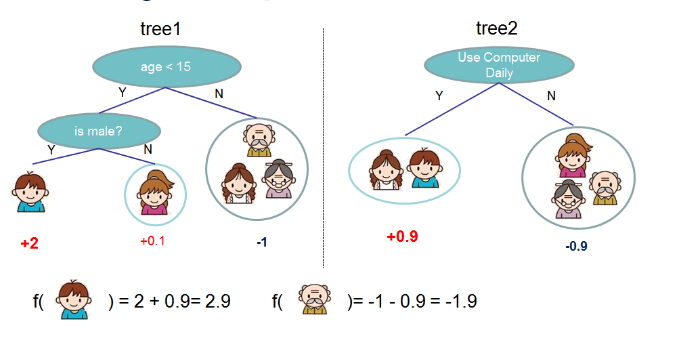

In [8]:
# Boosting example
from IPython import display
display.Image("Images/5_boosting_example.PNG")

In [14]:
# xgboost with cross-validation in scikit-learn
import pandas as pd
import xgboost as xgb

# get dataset
churn_data = pd.read_csv('5_datasets/telecom_churn_clean.csv')

# extract data and create DMatrix
X, y = churn_data.iloc[:, :-1], churn_data.iloc[:, -1]
churn_dmatrix = xgb.DMatrix(data=X, label=y)

# create the parameter dictionary for cross-validation
params = {'objective': 'reg:logistic', 'max_depth':3}

# perform cross-validation measuring accuracy
cv_results = xgb.cv(params=params,
                    dtrain=churn_dmatrix, nfold=3, 
                    num_boost_round=5, metrics='error',
                    as_pandas=True, seed=123)
print("Error results table:")
print(cv_results)

# print the accuracy
print('Accuracy: %f' %(1-cv_results['test-error-mean']).iloc[-1])

Error results table:
   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.091809         0.003729         0.100810        0.009031
1          0.091209         0.003414         0.102310        0.010505
2          0.085059         0.000735         0.096310        0.013471
3          0.079358         0.004682         0.093609        0.012143
4          0.076208         0.004893         0.092109        0.016006
Accuracy: 0.907891


In [15]:
# perform cross-validation measuing AUC
cv_results = xgb.cv(params=params,
                    dtrain=churn_dmatrix,nfold=3,
                    num_boost_round=5, metrics='auc',
                    as_pandas=True, seed=123)
print("AUC results table:")
print(cv_results)
print('AUC: %f' %(cv_results["test-auc-mean"]).iloc[-1])

AUC results table:
   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.836970       0.004261       0.823101      0.022819
1        0.852943       0.015413       0.842076      0.016330
2        0.884122       0.009758       0.872564      0.028379
3        0.898340       0.001999       0.886186      0.017050
4        0.903081       0.001136       0.891238      0.017270
AUC: 0.891238


#### 1.4 When should I use XGBoost?

When to use:

1. You have large number of training samples (> 1000 samples, < 100 features)
2. You have a mixture of categorical and numerical features or just numerical features

When **NOT** to use:

1. Image recognition (better with deep learning)
2. Computer vision (better with deep learning)
3. Natural Language Processing (NLP) and understanding problems (better with deep learning)
4. When the number of training samples is smaller than the number of features

### Chapter 2. Regression with XGBoost

#### 2.1 Regression review

What is a regression problem?
* The outcome is *real-valued*

Common regression metrics:
* Root mean squared error (RMSE)
* Mean absolute error  (MAE)

Loss functions and base learners:
* Loss function quantifies how far off a prediction is from the actual result
* Our goal is to minimize the loss function of all the data points we pass in

* The loss function names in XGBoost:
    1. reg:linear -> use for regressin problems
    2. reg:logistic -> use for classification problems when you want just decision
    3. binary:logistic -> use for classification problems when you want probability rather than decision

* Base learners are learners that are slightly better than random guess

In [ ]:
# method 1.
# load data
df = pd.read_csv('')

# create features and target: X, y
X, y = df.iloc[:, :-1], df.iloc[:, -1]

# create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)

# instantiate the XGBRegressor
xg_reg = xgb.XGBRegressor(objective='reg:linear', 
                          n_estimators=10, 
                          random_state=123)

# fit the classifier
xg_reg.fit(X_train, y_train)

# predict the labels of the test set
preds = xg_reg.predict(X_test)

# compute the rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print('RMSE: %f' %(rmse))